In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data analysis and preparation

In [2]:
training_set = pd.read_csv("Training.csv")

In [3]:
print(training_set.columns)

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)


In [4]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [5]:
print(training_set[:10])

   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   
5        0          1                     1                    0          0   
6        1          0                     1                    0          0   
7        1          1                     0                    0          0   
8        1          1                     1                    0          0   
9        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0               

In [6]:
print(list(set(training_set['prognosis'].values)))

['Hypertension ', 'Psoriasis', 'Pneumonia', 'Cervical spondylosis', 'Jaundice', 'Paralysis (brain hemorrhage)', 'Drug Reaction', 'Chicken pox', 'Hypoglycemia', 'Varicose veins', 'Acne', 'Hepatitis B', 'Peptic ulcer diseae', 'Hypothyroidism', '(vertigo) Paroymsal  Positional Vertigo', 'Heart attack', 'hepatitis A', 'Bronchial Asthma', 'Hyperthyroidism', 'Hepatitis E', 'Dengue', 'AIDS', 'Fungal infection', 'Alcoholic hepatitis', 'Common Cold', 'Tuberculosis', 'Typhoid', 'Dimorphic hemmorhoids(piles)', 'Hepatitis D', 'Osteoarthristis', 'Impetigo', 'Allergy', 'Migraine', 'Urinary tract infection', 'GERD', 'Arthritis', 'Chronic cholestasis', 'Diabetes ', 'Hepatitis C', 'Gastroenteritis', 'Malaria']


In [7]:
training_labels = training_set['prognosis']
training_labels

0                              Fungal infection
1                              Fungal infection
2                              Fungal infection
3                              Fungal infection
4                              Fungal infection
                         ...                   
4915    (vertigo) Paroymsal  Positional Vertigo
4916                                       Acne
4917                    Urinary tract infection
4918                                  Psoriasis
4919                                   Impetigo
Name: prognosis, Length: 4920, dtype: object

In [8]:
training_set.drop("prognosis", axis=1, inplace=True)
print(training_set[:10])

   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   
5        0          1                     1                    0          0   
6        1          0                     1                    0          0   
7        1          1                     0                    0          0   
8        1          1                     1                    0          0   
9        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0               

In [9]:
training_set.isnull().sum() # get info on number of null fields 

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
small_dents_in_nails    0
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
Length: 132, dtype: int64

In [10]:
training_set.isna().sum() # count missing values

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
small_dents_in_nails    0
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
Length: 132, dtype: int64

In [11]:
training_set.info() # get info on the data in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 132 entries, itching to yellow_crust_ooze
dtypes: int64(132)
memory usage: 5.0 MB


In [12]:
training_labels.value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

Text(0.5, 1.0, 'Distribution of diseases')

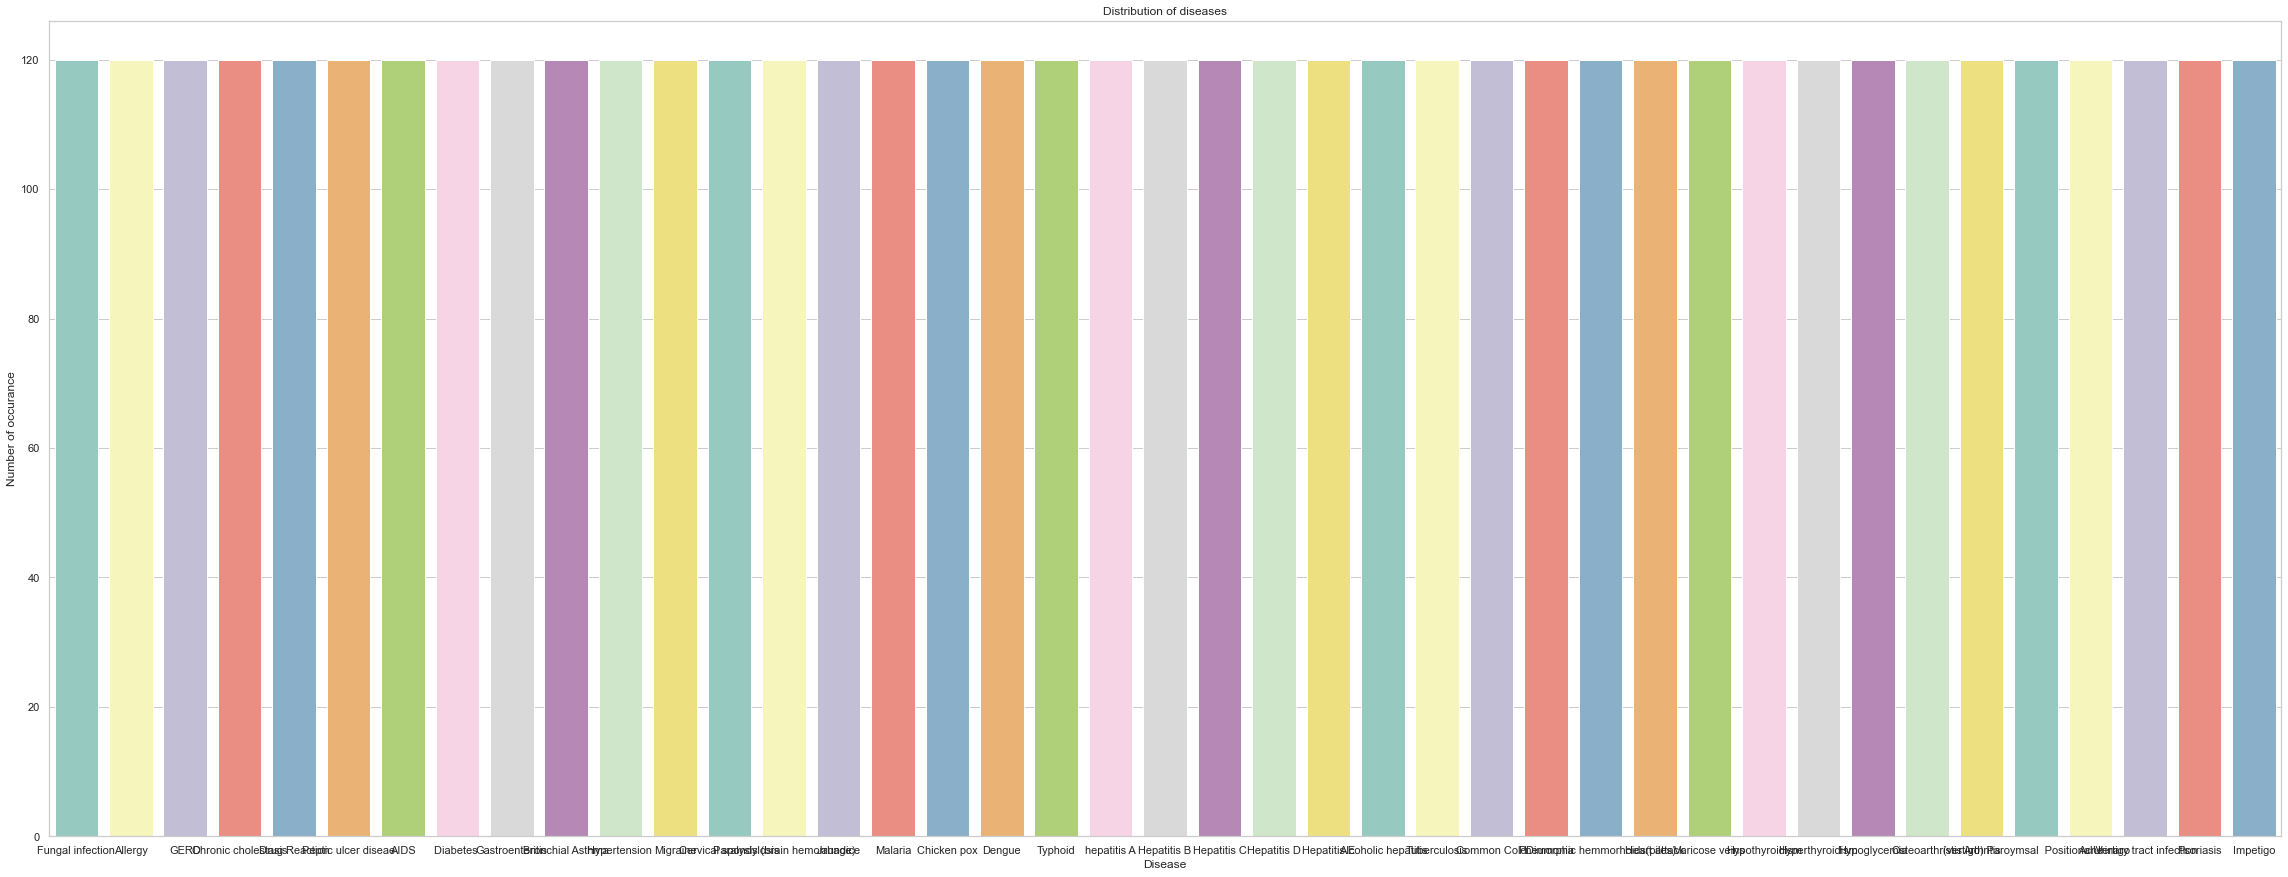

In [13]:
plt.figure(figsize=(40,15))
sns.set_theme(style="whitegrid")
sns.countplot(x=training_labels, data=training_set, palette="Set3")
plt.xlabel("Disease")
plt.ylabel("Number of occurance")
plt.title("Distribution of diseases")


In [14]:
testing_set = pd.read_csv("Testing.csv")

# Models creation, fit and prediction

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB, ComplementNB, CategoricalNB

from sklearn.pipeline import make_pipeline
models = {}
naive_bayes_classifiers = [MultinomialNB(), BernoulliNB(), GaussianNB(), ComplementNB(), CategoricalNB(), LogisticRegression(), KNeighborsClassifier(), SVC(), DecisionTreeClassifier(), RandomForestClassifier()]
for classifier in naive_bayes_classifiers:
    models[classifier] = make_pipeline(classifier)
print(models)

{MultinomialNB(): Pipeline(steps=[('multinomialnb', MultinomialNB())]), BernoulliNB(): Pipeline(steps=[('bernoullinb', BernoulliNB())]), GaussianNB(): Pipeline(steps=[('gaussiannb', GaussianNB())]), ComplementNB(): Pipeline(steps=[('complementnb', ComplementNB())]), CategoricalNB(): Pipeline(steps=[('categoricalnb', CategoricalNB())]), LogisticRegression(): Pipeline(steps=[('logisticregression', LogisticRegression())]), KNeighborsClassifier(): Pipeline(steps=[('kneighborsclassifier', KNeighborsClassifier())]), SVC(): Pipeline(steps=[('svc', SVC())]), DecisionTreeClassifier(): Pipeline(steps=[('decisiontreeclassifier', DecisionTreeClassifier())]), RandomForestClassifier(): Pipeline(steps=[('randomforestclassifier', RandomForestClassifier())])}


In [16]:
for classifier in models:
    classifier.fit(training_set, training_labels)

In [17]:
testing_labels = testing_set['prognosis']
testing_set.drop("prognosis", axis=1, inplace=True)

In [18]:
label_set = {}
for classifier in naive_bayes_classifiers:
    labels = classifier.predict(testing_set)
    label_set[type(classifier).__name__] = labels

# Models' results

Method used: MultinomialNB
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo      1.000     1.000     1.000         1
                                   AIDS      1.000     1.000     1.000         1
                                   Acne      1.000     1.000     1.000         1
                    Alcoholic hepatitis      1.000     1.000     1.000         1
                                Allergy      1.000     1.000     1.000         1
                              Arthritis      1.000     1.000     1.000         1
                       Bronchial Asthma      1.000     1.000     1.000         1
                   Cervical spondylosis      1.000     1.000     1.000         1
                            Chicken pox      1.000     1.000     1.000         1
                    Chronic cholestasis      1.000     1.000     1.000         1
                            Common Cold      1.000     1.000     1.000         1


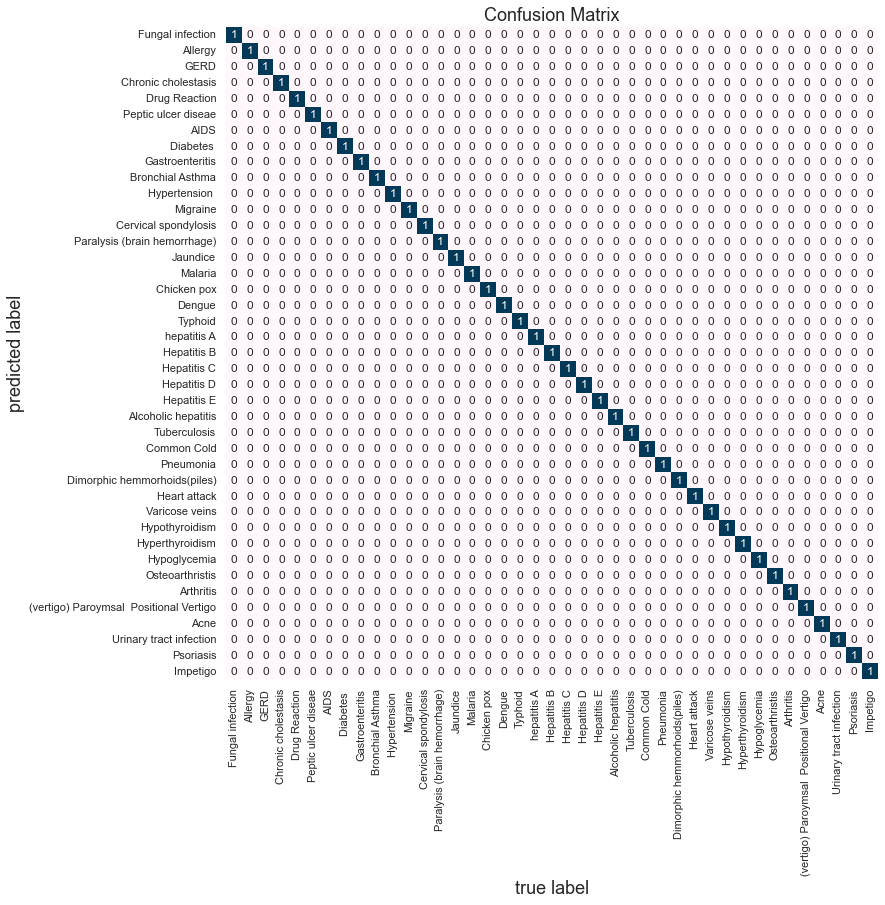

Method used: BernoulliNB
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo      1.000     1.000     1.000         1
                                   AIDS      1.000     1.000     1.000         1
                                   Acne      1.000     1.000     1.000         1
                    Alcoholic hepatitis      1.000     1.000     1.000         1
                                Allergy      1.000     1.000     1.000         1
                              Arthritis      1.000     1.000     1.000         1
                       Bronchial Asthma      1.000     1.000     1.000         1
                   Cervical spondylosis      1.000     1.000     1.000         1
                            Chicken pox      1.000     1.000     1.000         1
                    Chronic cholestasis      1.000     1.000     1.000         1
                            Common Cold      1.000     1.000     1.000         1
  

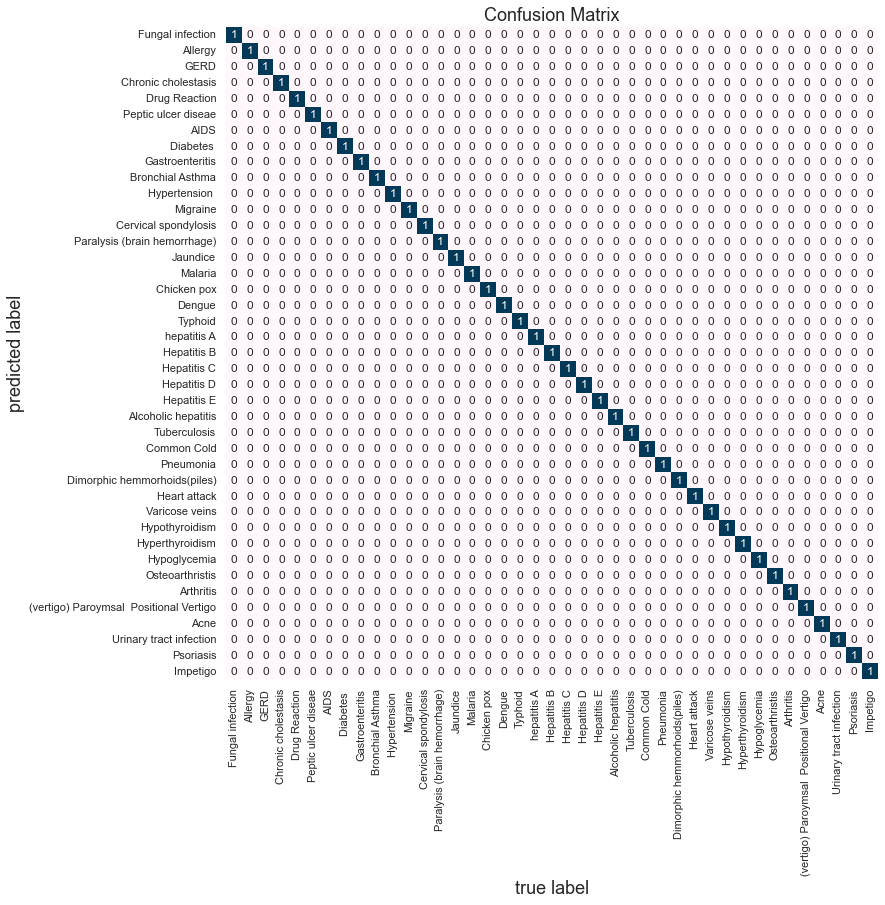

Method used: GaussianNB
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo      1.000     1.000     1.000         1
                                   AIDS      1.000     1.000     1.000         1
                                   Acne      1.000     1.000     1.000         1
                    Alcoholic hepatitis      1.000     1.000     1.000         1
                                Allergy      1.000     1.000     1.000         1
                              Arthritis      1.000     1.000     1.000         1
                       Bronchial Asthma      1.000     1.000     1.000         1
                   Cervical spondylosis      1.000     1.000     1.000         1
                            Chicken pox      1.000     1.000     1.000         1
                    Chronic cholestasis      1.000     1.000     1.000         1
                            Common Cold      1.000     1.000     1.000         1
   

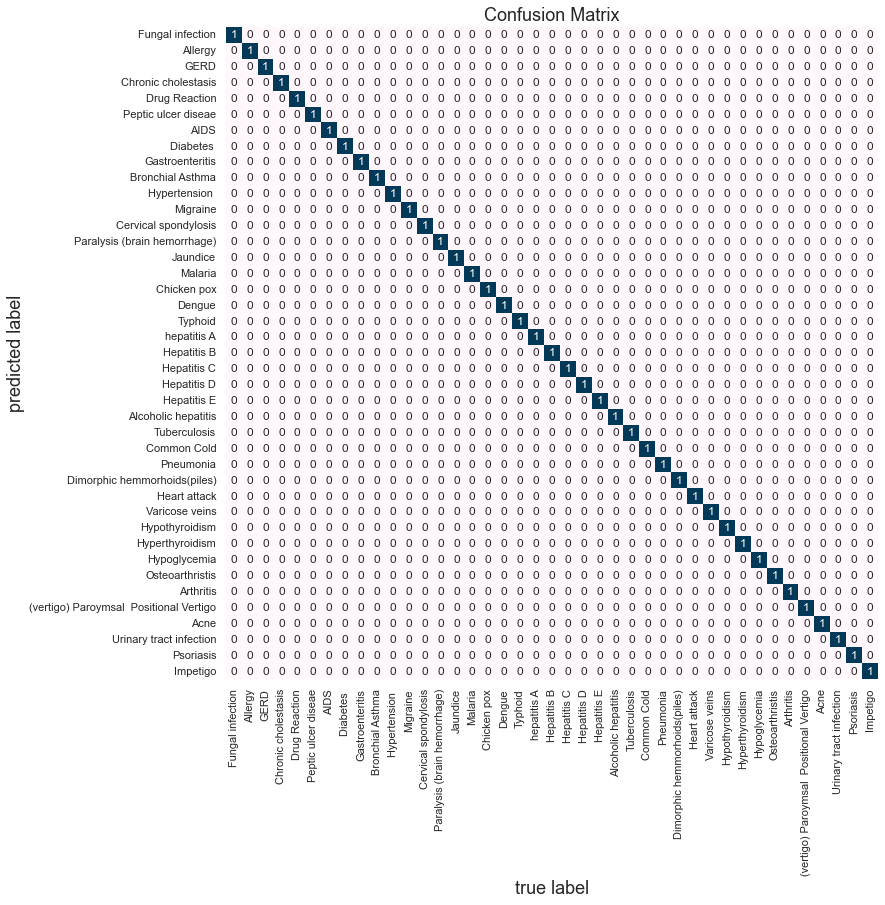

Method used: ComplementNB
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo      1.000     1.000     1.000         1
                                   AIDS      1.000     1.000     1.000         1
                                   Acne      1.000     1.000     1.000         1
                    Alcoholic hepatitis      1.000     1.000     1.000         1
                                Allergy      1.000     1.000     1.000         1
                              Arthritis      1.000     1.000     1.000         1
                       Bronchial Asthma      1.000     1.000     1.000         1
                   Cervical spondylosis      1.000     1.000     1.000         1
                            Chicken pox      1.000     1.000     1.000         1
                    Chronic cholestasis      1.000     1.000     1.000         1
                            Common Cold      1.000     1.000     1.000         1
 

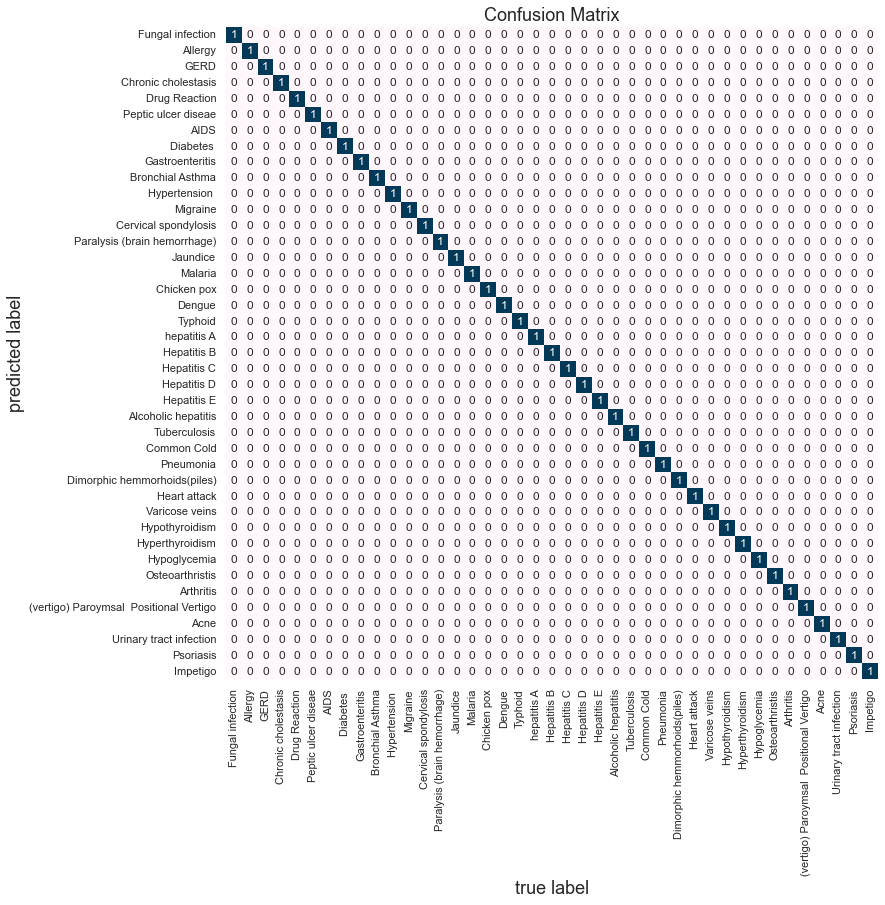

Method used: CategoricalNB
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo      1.000     1.000     1.000         1
                                   AIDS      1.000     1.000     1.000         1
                                   Acne      1.000     1.000     1.000         1
                    Alcoholic hepatitis      1.000     1.000     1.000         1
                                Allergy      1.000     1.000     1.000         1
                              Arthritis      1.000     1.000     1.000         1
                       Bronchial Asthma      1.000     1.000     1.000         1
                   Cervical spondylosis      1.000     1.000     1.000         1
                            Chicken pox      1.000     1.000     1.000         1
                    Chronic cholestasis      1.000     1.000     1.000         1
                            Common Cold      1.000     1.000     1.000         1


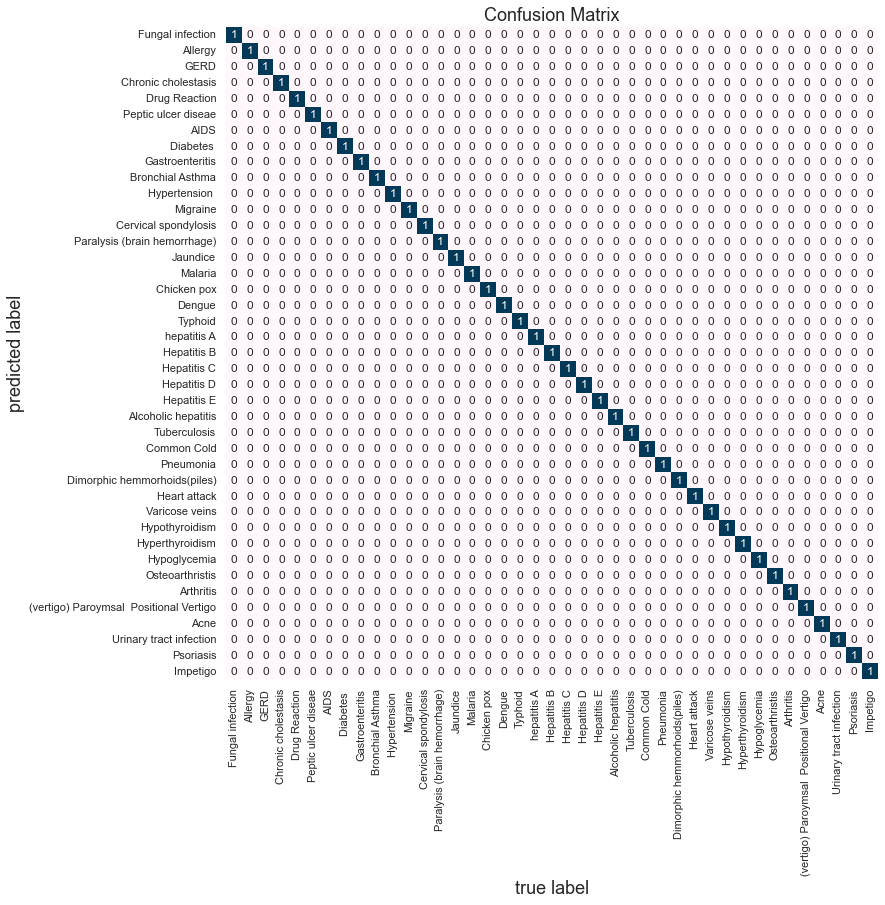

Method used: LogisticRegression
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo      1.000     1.000     1.000         1
                                   AIDS      1.000     1.000     1.000         1
                                   Acne      1.000     1.000     1.000         1
                    Alcoholic hepatitis      1.000     1.000     1.000         1
                                Allergy      1.000     1.000     1.000         1
                              Arthritis      1.000     1.000     1.000         1
                       Bronchial Asthma      1.000     1.000     1.000         1
                   Cervical spondylosis      1.000     1.000     1.000         1
                            Chicken pox      1.000     1.000     1.000         1
                    Chronic cholestasis      1.000     1.000     1.000         1
                            Common Cold      1.000     1.000     1.000      

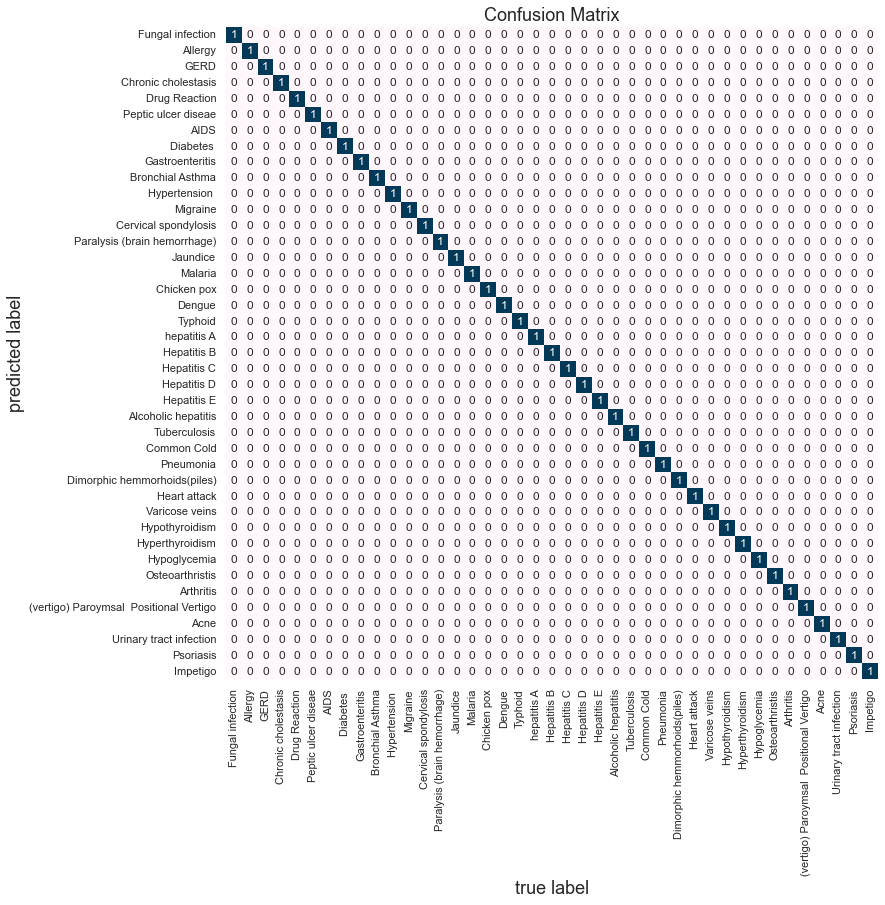

Method used: KNeighborsClassifier
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo      1.000     1.000     1.000         1
                                   AIDS      1.000     1.000     1.000         1
                                   Acne      1.000     1.000     1.000         1
                    Alcoholic hepatitis      1.000     1.000     1.000         1
                                Allergy      1.000     1.000     1.000         1
                              Arthritis      1.000     1.000     1.000         1
                       Bronchial Asthma      1.000     1.000     1.000         1
                   Cervical spondylosis      1.000     1.000     1.000         1
                            Chicken pox      1.000     1.000     1.000         1
                    Chronic cholestasis      1.000     1.000     1.000         1
                            Common Cold      1.000     1.000     1.000    

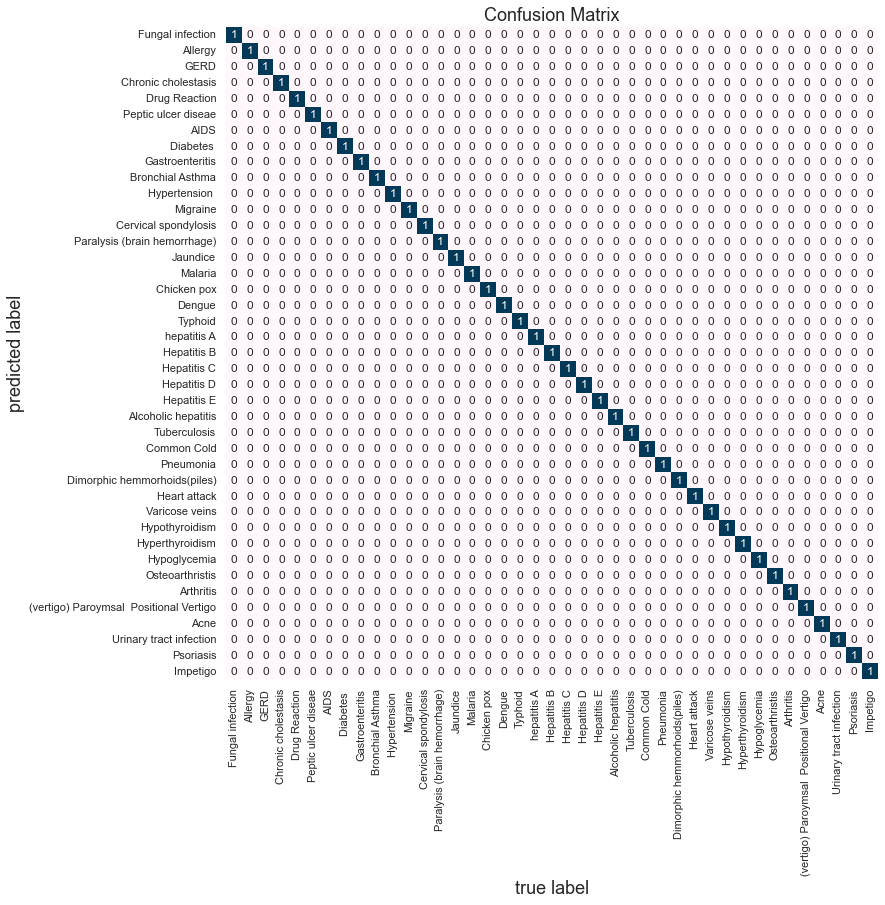

Method used: SVC
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo      1.000     1.000     1.000         1
                                   AIDS      1.000     1.000     1.000         1
                                   Acne      1.000     1.000     1.000         1
                    Alcoholic hepatitis      1.000     1.000     1.000         1
                                Allergy      1.000     1.000     1.000         1
                              Arthritis      1.000     1.000     1.000         1
                       Bronchial Asthma      1.000     1.000     1.000         1
                   Cervical spondylosis      1.000     1.000     1.000         1
                            Chicken pox      1.000     1.000     1.000         1
                    Chronic cholestasis      1.000     1.000     1.000         1
                            Common Cold      1.000     1.000     1.000         1
          

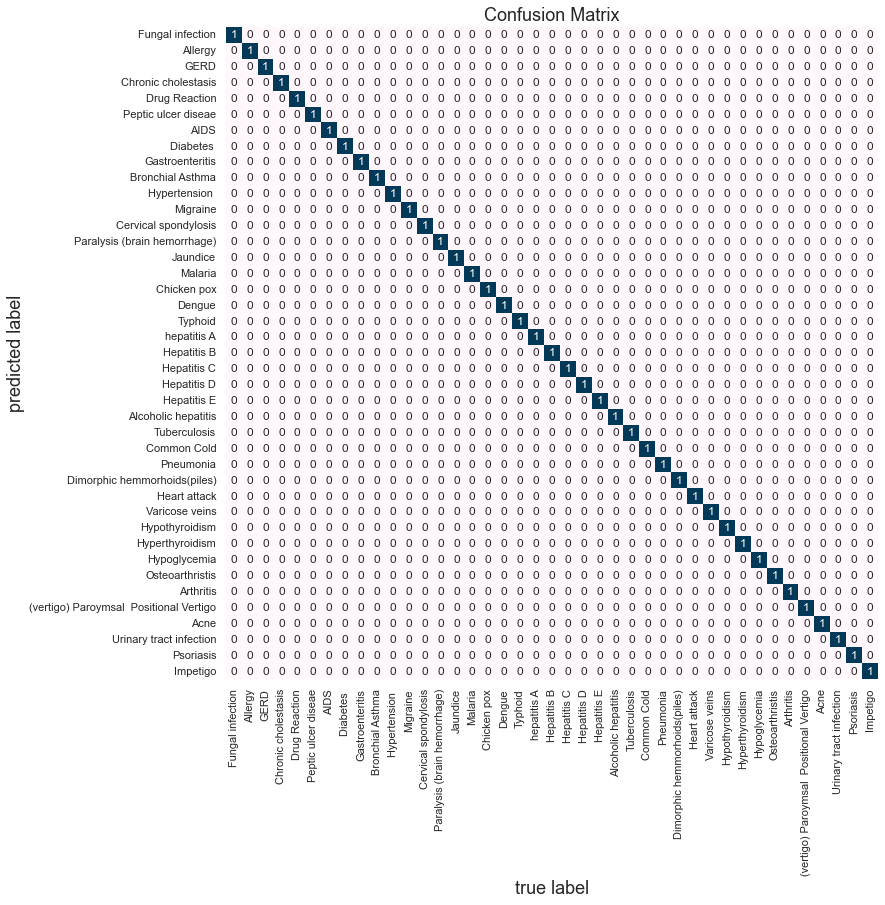

Method used: DecisionTreeClassifier
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo      1.000     1.000     1.000         1
                                   AIDS      1.000     1.000     1.000         1
                                   Acne      1.000     1.000     1.000         1
                    Alcoholic hepatitis      1.000     1.000     1.000         1
                                Allergy      1.000     1.000     1.000         1
                              Arthritis      1.000     1.000     1.000         1
                       Bronchial Asthma      1.000     1.000     1.000         1
                   Cervical spondylosis      1.000     1.000     1.000         1
                            Chicken pox      1.000     1.000     1.000         1
                    Chronic cholestasis      1.000     1.000     1.000         1
                            Common Cold      1.000     1.000     1.000  

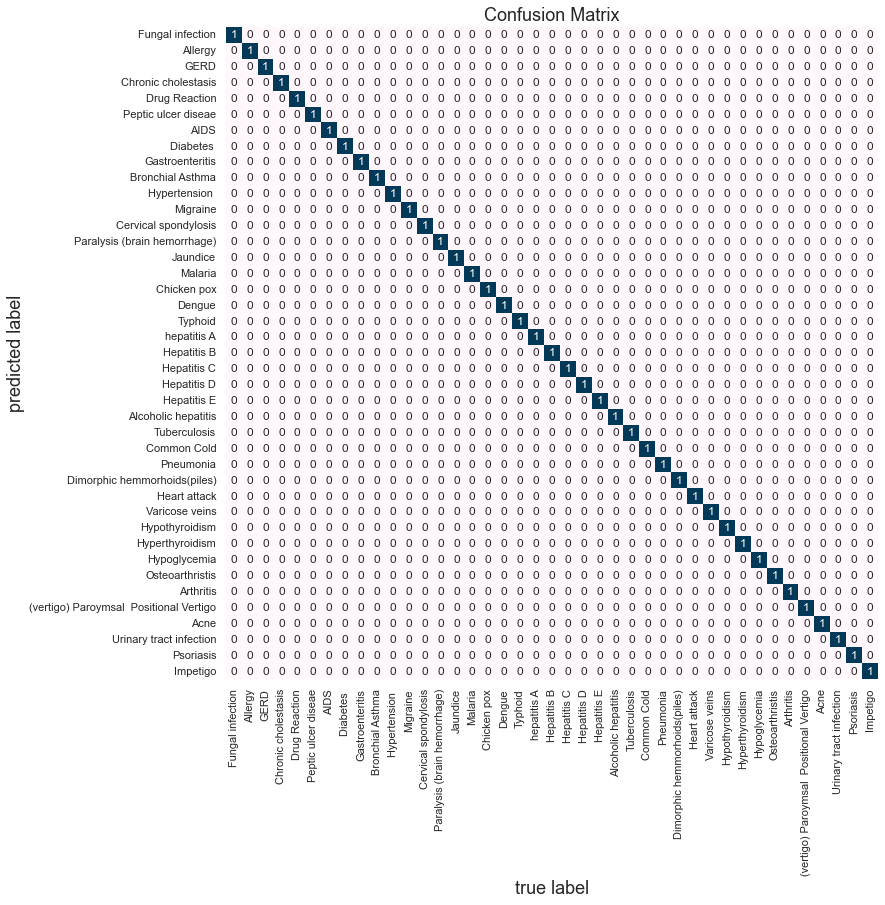

Method used: RandomForestClassifier
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo      1.000     1.000     1.000         1
                                   AIDS      1.000     1.000     1.000         1
                                   Acne      1.000     1.000     1.000         1
                    Alcoholic hepatitis      1.000     1.000     1.000         1
                                Allergy      1.000     1.000     1.000         1
                              Arthritis      1.000     1.000     1.000         1
                       Bronchial Asthma      1.000     1.000     1.000         1
                   Cervical spondylosis      1.000     1.000     1.000         1
                            Chicken pox      1.000     1.000     1.000         1
                    Chronic cholestasis      1.000     1.000     1.000         1
                            Common Cold      1.000     1.000     1.000  

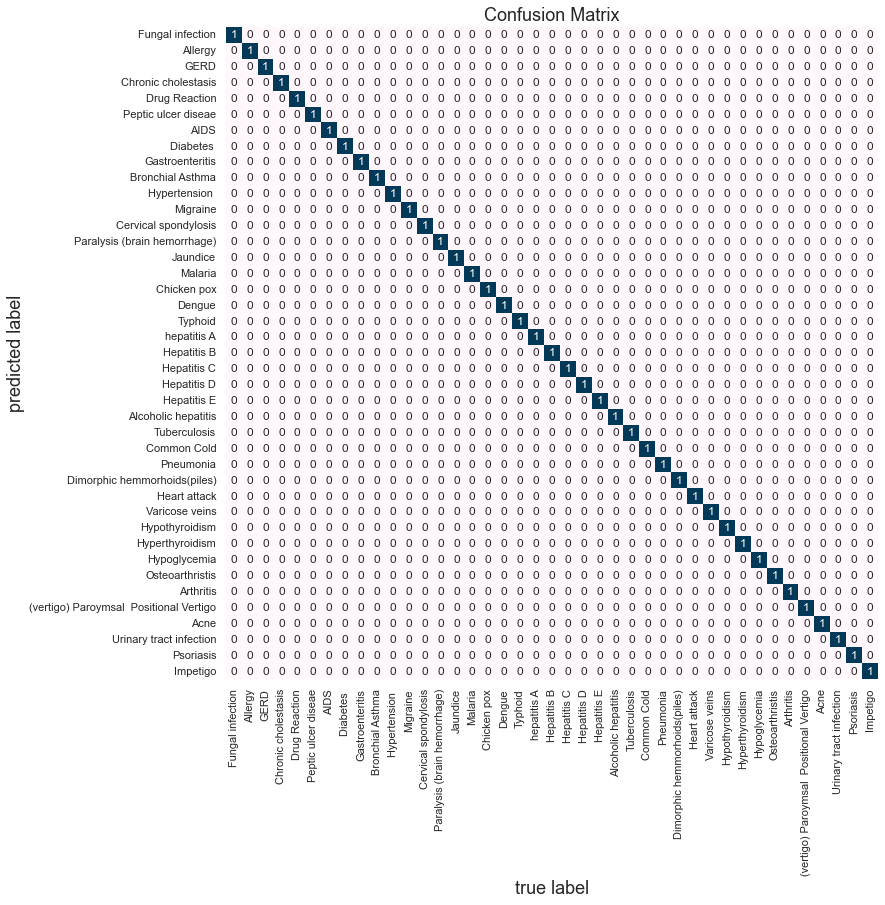

In [19]:
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score

for model, labels in label_set.items():
    print(f"Method used: {model}")
    print(classification_report(testing_labels, labels, digits=3))
    print(f'cohen kappa score: {cohen_kappa_score(testing_labels, labels)}')
    mat = confusion_matrix(testing_labels, labels)
    plt.figure(figsize=(15,12))
    sns.heatmap(mat.T, square=True, cmap= 'PuBu', annot=True, fmt='d', cbar=False, xticklabels=testing_labels.values, yticklabels=testing_labels.values)
    plt.xlabel('true label', fontsize=18)
    plt.ylabel('predicted label', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()
